# Netcdf + VAE analysis (libraries demonstration)

## Import the necessary libraries


### General libraries

In [1]:
### librairies necessaires, chercher la documentation au besoin
import netCDF4 as net
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from datetime import datetime, timedelta

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import models
from  IPython import display
import numpy as np
import matplotlib.pyplot as plt 
import os
import pathlib
import shutil
import tempfile
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow_probability as tfp
tfpd = tfp.distributions

## Netcdf

In [2]:
import bx_vae_lib as vl
import net_cdf_script as net

### Custom libraries

## Using the net_cdf_bx lib to extract data

In [3]:
## the path that I am going to use you can change it as needed
net.path = "/Users/billxue/tmax.eval.ERA-Int.CRCM5-OUR.day.NAM-22.raw.nc"

#### setting up the data

To manipulate net_cdf files, you need a target area within the database, and some special operations need to be made to map it (including the coordinate to define the backround map. 

For this libraries, the default values are defined for Quebec, and you can store the limits of the "grid" as so:

In [4]:
test_data = net.data[1, net.target_data[0]:net.target_data[1], net.target_data[2]:net.target_data[3]]

In [5]:
help(net.mapper)

Help on function mapper in module net_cdf_script:

mapper(data, title_name, fig_size=(20, 6), label='', coor_grid_lon=array([[-83.44335938, -83.15136719, -82.85974121, ..., -67.56106567,
        -67.29867554, -67.03692627],
       [-83.39160156, -83.09857178, -82.80584717, ..., -67.45800781,
        -67.19491577, -66.93243408],
       [-83.33950806, -83.04537964, -82.75164795, ..., -67.35437012,
        -67.09054565, -66.82736206],
       ...,
       [-79.71737671, -79.35113525, -78.98568726, ..., -60.44943237,
        -60.14382935, -59.8394165 ],
       [-79.63287354, -79.26495361, -78.8979187 , ..., -60.2956543 ,
        -59.98925781, -59.68405151],
       [-79.54742432, -79.17788696, -78.8092041 , ..., -60.14056396,
        -59.83340454, -59.5274353 ]]), coor_grid_lat=array([[42.31672287, 42.27830124, 42.23907852, ..., 38.91825485,
        38.83820724, 38.75751877],
       [42.53338242, 42.49481964, 42.45544815, ..., 39.12316895,
        39.04286957, 38.96192551],
       [42.7500190

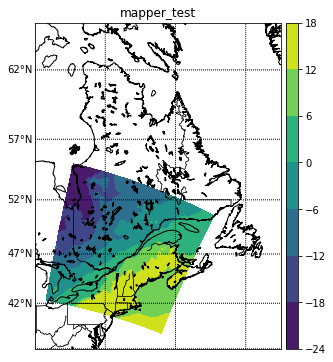

In [6]:
net.mapper(test_data, "mapper_test", path ="./images/" )

In [13]:
winter_data = net.season_analysis(0, mode = "data")

0 1979-12-21 12:00:00 -----> 1980-03-21 12:00:00
1 1980-12-21 12:00:00 -----> 1981-03-21 12:00:00
2 1981-12-21 12:00:00 -----> 1982-03-21 12:00:00
3 1982-12-21 12:00:00 -----> 1983-03-21 12:00:00
4 1983-12-21 12:00:00 -----> 1984-03-21 12:00:00
5 1984-12-21 12:00:00 -----> 1985-03-21 12:00:00
6 1985-12-21 12:00:00 -----> 1986-03-21 12:00:00
7 1986-12-21 12:00:00 -----> 1987-03-21 12:00:00
8 1987-12-21 12:00:00 -----> 1988-03-21 12:00:00
9 1988-12-21 12:00:00 -----> 1989-03-21 12:00:00
10 1989-12-21 12:00:00 -----> 1990-03-21 12:00:00
11 1990-12-21 12:00:00 -----> 1991-03-21 12:00:00
12 1991-12-21 12:00:00 -----> 1992-03-21 12:00:00
13 1992-12-21 12:00:00 -----> 1993-03-21 12:00:00
14 1993-12-21 12:00:00 -----> 1994-03-21 12:00:00
15 1994-12-21 12:00:00 -----> 1995-03-21 12:00:00
16 1995-12-21 12:00:00 -----> 1996-03-21 12:00:00
17 1996-12-21 12:00:00 -----> 1997-03-21 12:00:00
18 1997-12-21 12:00:00 -----> 1998-03-21 12:00:00
19 1998-12-21 12:00:00 -----> 1999-03-21 12:00:00
20 1999-12

In [14]:
winter_data[0].shape

(3069, 60, 60)

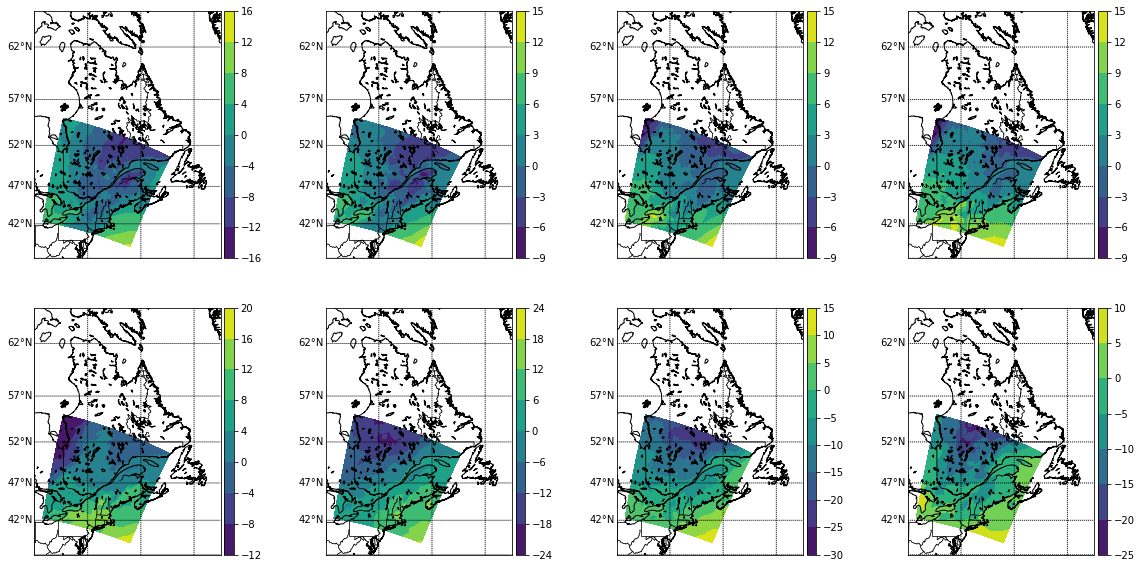

In [15]:
net.map_grid(winter_data[0], (2,4), "test_grid", path = "./images/")

In [16]:
encoder = [
    layers.Conv2D(60, (3,3), activation = "relu", padding = "same"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(60, (3,3), activation = "relu", padding = "same"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(60, (3,3), activation = "relu", padding = "same"),
    layers.MaxPooling2D((2,2))]


decoder = [layers.Dense(200,activation = "relu"),
    layers.Reshape((10,20,1)),
    layers.Conv2D(60, (3,3), activation = "relu", padding = "same"),
    layers.Conv2D(60, (3,3), activation = "relu", padding = "same"),
    layers.MaxPooling2D((2,2))]

STEPS_PER_EPOCH = 10
model1 = vl.VAE((60,60,1), 200, encoder = encoder,
                             decoder = decoder,weight = 0.00009)

2022-08-25 11:58:56.512503: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
model1.build_encoder()
model1.build_decoder()
model1.build_vae()

In [18]:
model1.vae.compile(optimizer = keras.optimizers.Adam(), loss = keras.losses.MeanSquaredError(), metrics = ["accuracy"])

In [19]:
winter_norm = np.average(winter_data[0])
variance = (np.average((winter_data[0] - winter_norm)**2))**(1/2)
final = (winter_data[0] - winter_norm)/(variance*1.2)

model1.vae.fit(final, final, epochs = 40, steps_per_epoch = STEPS_PER_EPOCH)

Epoch 1/40
10/10 [==============================] - 16s 1s/step - loss: 0.4533 - accuracy: 0.0000e+00
Epoch 2/40
10/10 [==============================] - 15s 1s/step - loss: 0.3526 - accuracy: 0.0000e+00
Epoch 3/40
10/10 [==============================] - 15s 2s/step - loss: 0.3116 - accuracy: 0.0000e+00
Epoch 4/40
10/10 [==============================] - 16s 2s/step - loss: 0.2008 - accuracy: 0.0000e+00
Epoch 5/40
10/10 [==============================] - 17s 2s/step - loss: 0.1228 - accuracy: 0.0000e+00
Epoch 6/40
10/10 [==============================] - 18s 2s/step - loss: 0.1111 - accuracy: 0.0000e+00
Epoch 7/40
10/10 [==============================] - 18s 2s/step - loss: 0.1034 - accuracy: 0.0000e+00
Epoch 8/40
10/10 [==============================] - 19s 2s/step - loss: 0.0908 - accuracy: 0.0000e+00
Epoch 9/40
10/10 [==============================] - 18s 2s/step - loss: 0.0758 - accuracy: 0.0000e+00
Epoch 10/40
10/10 [==============================] - 18s 2s/step - loss: 0.0712 - 

In [21]:
random_sample = np.random.randn(50,200)
random_maps = model1.decoder_m.predict(random_sample)
randoms_maps = random_maps.reshape(50,60,60)

2/2 [==============================] - 0s 12ms/step


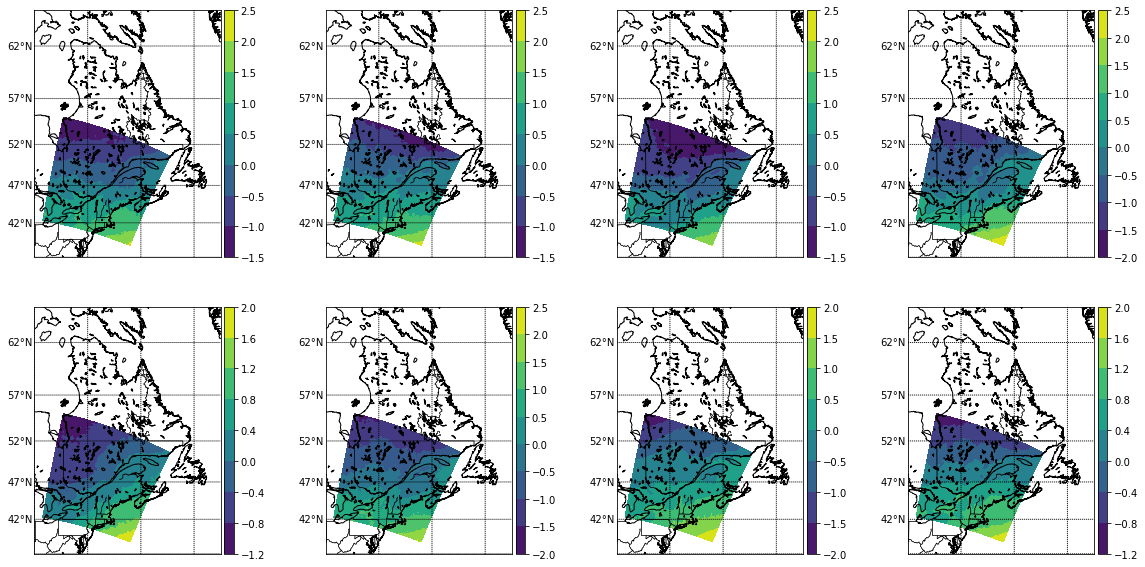

In [23]:
net.map_grid(randoms_maps, (2,4),"vae_tmax_random_samples", path = './images/')